In [ ]:
# Importing libraries
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

from fastbook import *
from fastai.vision.widgets import *

     |████████████████████████████████| 727kB 10.7MB/s 
     |████████████████████████████████| 194kB 23.4MB/s 
     |████████████████████████████████| 51kB 5.8MB/s 
     |████████████████████████████████| 1.2MB 13.0MB/s 
     |████████████████████████████████| 61kB 7.4MB/s 
     |████████████████████████████████| 776.8MB 25kB/s 
     |████████████████████████████████| 12.8MB 239kB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.
Mounted at /content/gdrive


In [ ]:
key = os.environ.get('AZURE_SEARCH_KEY', 'XXX') # Paste your azure key here

In [ ]:
guitar_types = 'les paul','stratocaster','sg'
path = Path('guitars')

In [ ]:
if not path.exists():
    path.mkdir()
    for i in guitar_types:
        dest = (path/i)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{i} guitar')
        download_images(dest, urls = results.attrgot('contentUrl'))

In [ ]:
path

Path('guitars')

In [ ]:
fns = get_image_files(path)
fns

(#408) [Path('guitars/les paul/00000009.jpg'),Path('guitars/les paul/00000003.png'),Path('guitars/les paul/00000069.jpg'),Path('guitars/les paul/00000016.jpg'),Path('guitars/les paul/00000065.jpg'),Path('guitars/les paul/00000121.jpg'),Path('guitars/les paul/00000000.jpg'),Path('guitars/les paul/00000140.jpg'),Path('guitars/les paul/00000039.png'),Path('guitars/les paul/00000074.jpg')...]

In [ ]:
failed = verify_images(fns)
failed

(#1) [Path('guitars/les paul/00000046.jpg')]

In [ ]:
failed.map(Path.unlink)

FileNotFoundError: ignored

In [ ]:
guitars = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [ ]:
dls = guitars.dataloaders(path)

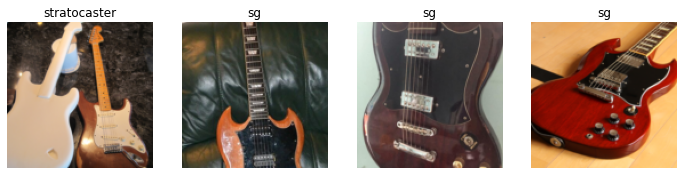

In [ ]:
dls.valid.show_batch(max_n=4, nrows=1)

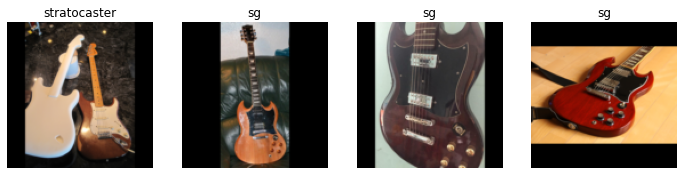

In [ ]:
guitars = guitars.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = guitars.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

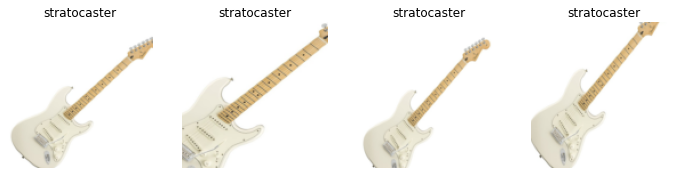

In [ ]:
guitars = guitars.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = guitars.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

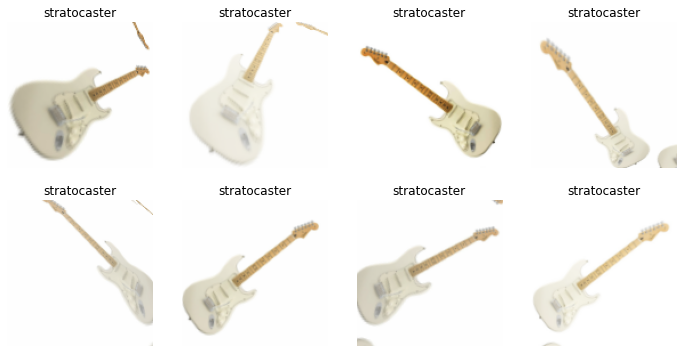

In [ ]:
guitars = guitars.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = guitars.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.671617,1.277782,0.419753,00:20


epoch,train_loss,valid_loss,error_rate,time
0,1.153689,1.150051,0.358025,00:20
1,0.983743,0.909885,0.271605,00:21
2,0.888083,0.798899,0.259259,00:20
3,0.802467,0.755952,0.246914,00:21


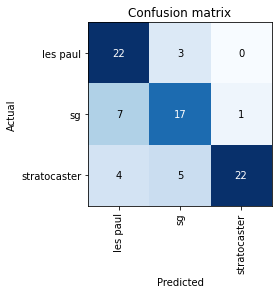

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

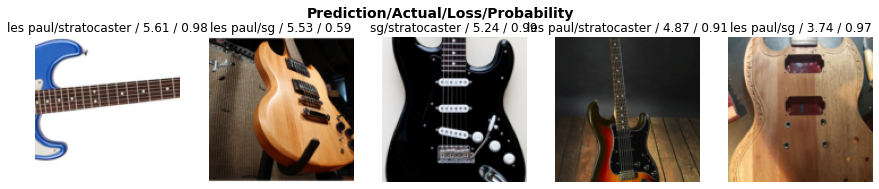

In [ ]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner